# **2. Programming**

### **2.1 Dataloading: getting the dataset ready** (worth up to 15 points)

### *Preamble*

In this assignment we are going to work with a real-world dataset called [MNIST](http://yann.lecun.com/exdb/mnist/). This popular dataset of handwritten digits contains 50,000 training samples and 10,000 testing samples. 

We are also going to work with the Python-based deep learning framework [Pytorch](https://pytorch.org/). Pytorch offers a number of useful functions for all stages of the design of a deep learning-based framework: dataset acquisition, dataloading, model implementation, backpropagation, pre-trained Convolutional Neural Networks, visualization, among others. You are encouraged to read Pytorch tutorials such as [this](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) and [this](https://colab.research.google.com/drive/1gCgtlnMPVWY0l1ra8ssS0EzJiWaVR4Pk#scrollTo=0nZwZukWXUDn) before proceeding. 

Alongside with [TensorFlow](https://www.tensorflow.org/), Pytorch represents one of the most popular open source libraries used for machine learning/deep learning development and deployment.  

### *Downloading and preparing the MNIST dataset*

In this first segment of the assignment you are asked to download MNIST (using Pytorch functions) and create indices to divide it into training, validation and testing. These indices will drive the creation of dataloaders aiming to facilitate the access to batches of these three subsets (an important ability when working with larger datasets).  

In [ ]:
READ_THE_INSTRUCTIONS_FLAG = True

In [ ]:
import sys
import torch # PyTorch 
from torchvision import datasets  
import torchvision.transforms as transforms 
from torch.utils.data.sampler import SubsetRandomSampler # Sampler 
import numpy as np 

print('-'*40)
print ('Python version: {}'.format(sys.version))

if not READ_THE_INSTRUCTIONS_FLAG:
  raise Exception('Please go back and read the instructions.')
else:
  print('\nThank you for reading the instructions.')
print('-'*40)

----------------------------------------
Python version: 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]

Thank you for reading the instructions.
----------------------------------------


In [ ]:
# TO-DO: use torchvision's "datasets" to download the MNIST dataset. You are asked to 
# download two sets: "mnist_train" and "mnist_test". 
# tip: the variable "train" in the MNIST-downloading function determines the segment of the 
# dataset you are trying to download (i.e., train or test)
# Note: we are going to read the data as Tensors (similar to numpy arrays, but they are 
# more adequate to handle using either the CPU or GPU—as we know, GPUS are the 
# preferred processing unit when training neural networks). Therefore, when reading the dataset, 
# set the parameter "transform" such that the data is read as a Tensor. 

mnist_train = datasets.MNIST('', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()])) # TO-DO
mnist_test = datasets.MNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()])) # TO-DO

# Note: you will try to download the MNIST dataset from Yann Lecun's webiste. If it is unavailable, you can use this 
# alternative source: 
# !wget www.di.ens.fr/~lelarge/MNIST.tar.gz
# !tar -zxvf MNIST.tar.gz 

# A sucessful download of MNIST should look like: https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A4/downloading_the_dataset.jpg 

In [ ]:
# In this cell you will partition the train set into "train" and "validation". 
# We already have a training and testing set. As discussed in class, a good practice is 
# to also create a validation subset (to be used during training to avoid overfitting). 

idx = np.arange(len(mnist_train.targets)) #TO-DO: create a list of indices with lenght equal to the number of training samples
# e.g., for 5 training samples, the idx list would be "01234"

# TO-DO: shuffle the elements of this indices list
np.random.shuffle(idx)

print("First 20 shuffled indices: {}".format(idx[0:20]))
# Note: make sure that the indices printed are shuffled. 

# Divide the "idx" list of shuffled indices into 70% for "training_idx" and 
# 30% for "validation_idx"
# e.g., idx = 0 72 12 48 39 85 120 3 1 98
# training_idx would be the first 70% indices: 0 72 12 48 39 85 120  
# validation_idx would be the remaning 30% indices: 3 1 98 

training_idx = np.split(idx, [int(len(idx)*0.7)])[0] #TO-DO
validation_idx = np.split(idx, [int(len(idx)*0.3)])[0] #TO-DO

First 20 shuffled indices: [11515 51925 37238 36245 32929 27903  4269  1241 10524 30265 58196 44240
  6762 47733 38241 31055 58332 29774 27684 48386]


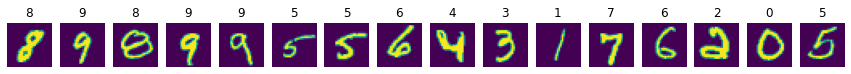

In [ ]:
# Now we are going to use dataloaders to get the data ready to be used with Pytorch models. You will Pytorch's  
# "SubsetRandomSampler" module, as well as its Dataloader functions. 

# TO-DO: define "samplers". These are lists specifying the shuffled indices we are going to use when reading the 
# previously downloaded MNIST dataset (you created these shuffled lists in the last cell). 
training_smp = SubsetRandomSampler(training_idx) #TO-DO: use Pytorch's "SubsetRandomSampler" to create a sampler based on your "train_idx" list
validation_smp = SubsetRandomSampler(validation_idx) #TO-DO: use Pytorch's "SubsetRandomSampler" to create a sampler based on your "validation_idx" list

# TO-DO: use Pytorch's "Dataloader" function to create loaders (i.e., structures that help handling the data even in 
# arbitrarily large datasets). Note that the division in your training set is going to be given by the samplers that 
# you just created.
# note: set the input parameter "num_workers" to zero (this can be used to have multiple subprecesses involved in the 
# dataloading) 

bsize = 16 # number of images to be considered at a time (i.e., "minibatch" from class 14)

training_loader = torch.utils.data.DataLoader(mnist_train, sampler=training_smp, batch_size=bsize, num_workers=0) #TO-DO (create a loader using PyTorch's DataLoader function, mnist_train and your training_smp)
validation_loader = torch.utils.data.DataLoader(mnist_train, sampler=validation_smp, batch_size=bsize, num_workers=0) #TO-DO (create a loader using PyTorch's DataLoader function, mnist_train and your validation_smp)
testing_loader = torch.utils.data.DataLoader(mnist_test, batch_size=bsize, num_workers=0) #TO-DO (create a loader using PyTorch's DataLoader function and mnist_test)

# Debugging the dataloading process. 
# In order to make sure that the dataloading process was correctly completed, we will read and display
# a number of datapoints from the training set. 

# Dataloaders make the datareading process extremely easy:
datal = iter(training_loader) #TO-DO: grab an entire dataloader of training images and their respective labels
imgs, labels = datal.next() #TO-DO: from the dataloader, grab a single minibatch of images and their labels  

# TO-DO: use matplotlib to display a minibatch of images and their respective labels.
# Your plot should look like this: https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A4/sample_training_minibatch.jpg  
# tip 1: you might need to change the format of the images before displaying them with 
# matplotlib
# tip 2: when reading individual images from the dataloader, they are considered to be 
# (N,H,W), where N represents the number of samples (1), thus your dimensions are 1x28x28 (for
# mnist samples). You have to deal with this extra dimension before plotting a sample.

import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

for i in range(len(imgs)):
    plt.subplot(2, len(imgs), i+1)
    plt.imshow(imgs[i].view(28,28)) # cmap='Greys_r'
    plt.title(labels[i].item())
    plt.axis('off')


### **2.2 Convolutional Neural Network creation** (worth up to 25 points)

We are going to create a small Convolutional Neural Network (CNN) to perform an  image classification task on the handwritten digits dataset. This network is specified by defining its architecture and forward passes (the backward pass, where backpropagation happens, is automatically implemented by torch.autograd). 

In this segment you will define a custom CNN [(architecture)](https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A4/model.jpg) and perform an initial analysis on its ability to receive a batch of inputs and create corresponding (untrained) predictions.     



In [ ]:
import torch.nn as nn
import torch.nn.functional as F

#TO-DO: time to build your own CNN! The template of the "my_network" function will walk you through its creation process. 
# the architecture that you are trying to reproduce is the following: https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A4/model.jpg  

class my_network(nn.Module):

    def __init__(self): # this function will detail the architecture of your CNN
        super(my_network, self).__init__()

        # Define the convolution and fully connected (FC) layers (note: pooling and 
        # activation functions are going to be defined only in the forward pass—next function)  
        
        # First, two convolution layers: conv1 and conv2
        # conv1 takes the input (1x28x28 tensors), uses 3x3 conv. kernels and outputs 
        # 6 channels. 
        # conv 2 takes the 6 channels from the previous layer and uses 3x3 conv kernel 
        # to output 12 channels
        # tip: use nn.Conv2d

        # TO-DO: define the convolutional layers of the network (e.g., self.conv1)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3)

        # Second, define the fully connected layers at the end of the network (i.e., 
        # the neural network at the end of the CNN).
        # Your neural network will have four FC layers. 
        
        # fc1: The input of the first FC layer is going to be given by the dimensions
        # of the input image after going throught two convolution operations (as well as the 
        # max poolings) times the number of channels coming from the conv2 layer. As discussed in class, you
        # can use the following formula to calculate the dimensions of an input after a CONVOLUTION takes 
        # place (you will also have to consider the max pooling—see the "forward" function below): 

        # ([(W - K + 2P)/S] + 1)
        # W = Input size
        # K = Filter size
        # S = Stride 
        # P = Padding 

        # Set the OUTPUT of fc1 to 140 dimensions
        # fc2: output = 80 dimensions
        # fc3: output = 40 dimensions
        # fc4: output = 10 dimensions 

        # tip: use nn.Linear

        # TO-DO: define the fully connected layers of the network (e.g., self.fc1)
        self.fc1 = nn.Linear(300, 140) # fc1: input = 28x28x1 -conv2d -> 26x26x6 -pool -> 13x13x6 -conv2d -> 11x11x12 -pool -> 5x5x12 = 300
        self.fc2 = nn.Linear(140, 80)
        self.fc3 = nn.Linear(80, 40)
        self.fc4 = nn.Linear(40, 10)
       
    def forward(self, data):

        # The forward pass will specify the path that a tensor does from 
        # input to output. We will use the layers we already defined and 
        # connect them with pooling and activation layers

        # First, define BLOCK 1, which receives the input, passess it through 
        # the conv1 layer, applies a ReLU in the result, and then a max pooling layer
        # in the result of the ReLU. In other words, input -> conv1 -> ReLU -> max pool
        # Note: use a (2,2) kernel for the max pooling with stride=2
        # tips: F.max_pool2d, F.relu

        # Second, use the output of this first block in a similar BLOCK 2 of:
        # conv2 -> ReLU -> max pool (again, (2,2) windows on max pool and stride=2)

        # TO-DO:
        # define BLOCK 1
        # use the output of BLOCK 1 to calculate the output of BLOCK 2  

        block_1 = F.max_pool2d(F.relu(self.conv1(data)), (2,2), stride=2)
        block_2 = F.max_pool2d(F.relu(self.conv2(block_1)), (2,2), stride=2)

        # Take a moment to manually determine what are the dimensions of the data at this point (i.e., CxhxW). 
        # These dimensions are important for the calculation of the input size of fc1 (see above).
        # Tip: when using max pool with a (2,2) kernel and stride=2 on a square images with an 
        # odd number of pixels (e.g., 15x15), consider the integer in the output dimensions. 
        # e.g., 31 x 31 -> max pool (2,2) stride 2 -> 15 x 15 

        # TO-DO: flatten the data so that it can be used in the first FC layer.
        flattened = block_2.flatten(start_dim=1) #TODO # or block_2.view(-1, 300)

        # In this solution you can use the "num_flat_features" helper function provided to calculate the number of 
        # features from a single sample, which helps the flattening process.
        # mannualy, the calculations would be: 
        # input: 28 x 28
        # output of block 1: 13 x 13
        # output of block 2: 5 x 5 

        # number of elements: 5 x 5 x 12 = 300

        # TO-DO: use the flattened data as the input of the first fc1, and apply a ReLU 
        # after it. 
        # Do the same process for fc2 and fc3 (i.e., apply ReLU to the output).
        # You do not need to apply ReLU to the output of fc4 (these are the predictions 
        # of the system—they might take negative values)

        out = F.relu(self.fc1(flattened))
        out = F.relu(self.fc2(out))
        out = F.relu(self.fc3(out))
        out = self.fc4(out)

        return out # return the output of the forward pass

model = my_network() #TO-DO create o model using the architecture you just defined

print(model)

# Tip: you can use the summary function (!pip install torchsummary; from torchsummary import summary)
# to help you make sure that your model's architecture is correct.
# If this function runs correctly, your model is ready to receive a batch input 
# https://github.com/sksq96/pytorch-summary 
# Reference output: https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A4/summary_fnc.jpg

!pip install torchsummary
from torchsummary import summary
summary(model, input_size=(1, 28, 28), batch_size=bsize)

my_network(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=300, out_features=140, bias=True)
  (fc2): Linear(in_features=140, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=40, bias=True)
  (fc4): Linear(in_features=40, out_features=10, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [16, 6, 26, 26]              60
            Conv2d-2           [16, 12, 11, 11]             660
            Linear-3                  [16, 140]          42,140
            Linear-4                   [16, 80]          11,280
            Linear-5                   [16, 40]           3,240
            Linear-6                   [16, 10]             410
Total params: 57,790
Trainable params: 57,790
Non-trainable params: 0
-----------------------------------------

In [ ]:
# Initial testing of the network

# TO-DO: use your function to make predictions in one minibatch of the training set. Present the 
# predictions of the model (since the model was not yet trained, they will be meaningless numbers)
# imgs = TO-DO: grab the images of a batch
# labels = TO-DO: grab the labels of this same batch
# TO-DO: print the shape of the minibatch
# note: you can use a minibatch from train, validation or test at this stage

print('Minibatches:')
for imgs, labels in testing_loader:
    print('\tbatch size is ->', imgs.shape[0], '\n')
    break

# pred = TO-DO: perform a set of predictions using your model and print them  
# Note: Pytorch expects minibatches as inputs (i.e., nSamples x nChannels x Height x Width).
# If you working with a single image, you have to add one dimension to simulate a minibatch. 
# You can use input.unsqueeze(0) to accomplish that.  

print('predictions:')
for img in imgs:
    pred = model(img.unsqueeze(0)).detach()[0].numpy()
    print('\t', pred, '\n')
    break # uncomment to see for iterating a minibatch of 16 images

# TO-DO: create a function that receives raw values (i.e., predictions of your model)
# and turns them into probabilities. 
# Recall from lecture 13 that the Softmax function is able to do that. 

def my_softmax(logits):
    ## TO-DO implement softmax
    probs = np.exp(logits) / sum(np.exp(logits) )
    return probs # return normalized probabilities

# TO-DO: use your my_softmax function to print the probabilities associated with the 
# predictions of your model for the sample minibatch that you calculated earlier in this cell.

print('pred with softmax:')
for img in imgs:
    pred = my_softmax(model(img.unsqueeze(0)).detach()[0].numpy())
    print('\t', pred, '\n')
    break # uncomment to see for iterating a minibatch of 16 images

Minibatches:
	batch size is -> 16 

predictions:
	 [ 0.09475829 -0.03103161  0.1492059   0.01066121  0.10728686 -0.07510205
  0.15745795  0.1118851  -0.1522839   0.11361382] 

pred with softmax:
	 [0.1042143  0.09189618 0.11004583 0.09580859 0.10552816 0.08793422
 0.11095769 0.10601453 0.08140259 0.10619795] 



### **2.3 Calculating the losses mannualy and automatically** (worth up to 10 points)

As discussed during Lectures 13 and 14, loss functions are able to calculate how close to a given ground truth value a set of predictions are. The losses calculated serve as the basis for backpropagation methods, thus their importance. 

In this segment you are asked to create a function to manually calculate the cross-entropy loss of a set of predictions and compare it with that calculated by Pytorch. You will also calculate the SVM Multiclass loss for illustration purposes. 


In [ ]:
from math import isclose

# the "nn" module of Pytorch implementes a number of losses for classification and regression problems. We are going to 
# explore the use of both Multiclass SVM and Cross-entropy loss. 
# probs = TO-DO # a "probabilities" version of your predictions. Refer to the last cell 
# for the implementation of "my_softmax"
probs = np.apply_along_axis(my_softmax, 1, model(imgs).detach().numpy())

# TO-DO: implement the cross_entropy loss mannualy using the "my_cross_entropy" function. 
# Recall that the loss calculated by this function will be the mean of the cross-entropy loss
# considering all the elements of a minibatch.

def my_cross_entropy(probs, labels):

    # This function receives probabilites and labels, and returns a single scalar 
    # representing the mean cross-entropy loss. 

    labels = np.identity(10)[labels.numpy()]
    loss = - np.sum([y * np.log(x) for x, y in zip(probs, labels)]) / labels.shape[0]

    return loss

# TO-DO: use your "my_cross_entropy" function to calculate the cross-entropy loss
# of pred (which you calculated earlier in this cell) based on the correct labels.
# Print both the results of your "my_cross_entropy" loss function and the 
# cross-entropy loss value 
# calculated using Pytorch's "nn.CrossEntropyLoss"
manual_ce_loss = my_cross_entropy(probs, labels) #TO-DO # use your function

# reference CE loss: now use Pytorch's function to calculate the cross-entropy loss
loss = nn.CrossEntropyLoss()
reference_ce_loss = loss(model(imgs), labels) #TO-DO: calculate CE loss using Pytorch's function

# Assertion to make sure that your manual CE loss yelds similar values to the automatic one. 
assert (isclose(reference_ce_loss,manual_ce_loss,abs_tol=1e-2)), 'The manual and automatically calculated CE losses are too different.'

# TO-DO: Calculate and print the Multiclass SVM loss for this same set of predictions.  
# Tip: Pytorch's "MultiMarginLoss"
loss = nn.MultiMarginLoss()
multiclass_svm_loss = loss(model(imgs), labels) #TO-DO: calculate multiclass svm loss using Pytorch's function

print('Manual cross-entropy loss: {}\nReference cross-entropy loss: {}\nMulticlass SVM Loss:{}'.format(manual_ce_loss,reference_ce_loss,multiclass_svm_loss))

Manual cross-entropy loss: 2.2924874871969223
Reference cross-entropy loss: 2.292487621307373
Multiclass SVM Loss:0.8851147294044495


### **2.4 Training your CNN** (worth up to 40 points + 5 extra points)

Togheter with the creation of a network, the training routine represents the most important aspect of a DL-based image classification framework. 

In this segment, you will implement a training loop that predicts scores from batches of samples from the training set, and based on the losses (and gradients) calculated, updates the values of the network's parameters. 


In [ ]:
# Before starting the training, observe in this illustrative cell the process used
# to log the statistics of your training using TensorBoard in Google Colab.
# This is an extremely useful way to make sure that your training process is 
# progressing correctly (i.e., not overfitting or stuck in the optimization process)

from torch.utils.tensorboard import SummaryWriter
%load_ext tensorboard
import os
import shutil

logs_base_dir = "runs" # directory where the logs are going to be saved
if os.path.exists('runs/'):
  shutil.rmtree('runs/')
os.makedirs(logs_base_dir, exist_ok=True)

logger = SummaryWriter() # this is the object that is going to log your statistics.
# it can be used to log images, models, as well as simple scalars (our case)

# Consider the simple example below. We want to save and present:
# 1 - a title for the graph 
# 2 - the value of the scalar at index t
# 3 - index t
for i in range(1, 10): # add 20 sample scalars
    logger.add_scalar("Powers of two", 2**i, i) # adds the title, value and index to the logger

logger.close() # closes the logger to get it ready to present the values

%tensorboard --logdir {logs_base_dir}
# note: clear the logs in your "run" folder before starting to avoid clutter

In [ ]:
# In this cell you are going to code the training routine of your model

import torch.optim as optim

# Before starting the training process, you need to define the optimizer and loss function
# to be used. We are going to use ADAM as an optimizer, and cross-entropy loss as a loss function. 

# TO-DO: define the loss function to be used ("criterion") as well as the otimizing strategy ("optimizer").
# tip: use Pytorch's "nn" and "optim" modules. 

learning_rate = 0.001 # TO-DO: determines the step size for the optimization algorithm (tip: start with 0.001)

criterion = nn.CrossEntropyLoss() # TO-DO define the loss function (your choice! use one of the options discussed in class)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # TO-DO define the opmitmizer (your choice! use one of the options discussed in class)

n_epochs = 3 # TO-DO: number of times the whole (shuffled) dataset is going to be visited (tip: start with a small number—this is 
# a simple dataset that should not take more than a couple of epochs to train efficiently)

# TO-DO: create the "performance_on_validation" function to calculate the performance of your model
# on the validation set during the training routine. 

def performance_on_validation(validation_loader): # receives the validation set data loader as input 

    nValSamples = len(validation_loader) # TO-DO: calculates the number of validation samples from the dataloader

    # create a validation accuracy variable
    val_acc = 0.0

    # Create a for loop that visits all minibatches of the validation set. 
    # for .. TO-DO:
    for imgs, labels in validation_loader:

        outputs = model(imgs).detach().numpy() # TO-DO : predicts the scores of a minibatch (i.e., uses your model)
        prediction = np.apply_along_axis(my_softmax, 1, outputs).argmax(axis=1) # TO-DO: based on the scores, predicts a class for each of the samples in the minibatch 
        val_acc += np.sum(prediction == labels.detach().numpy()) / labels.shape[0] # TO-DO: sum to the val_acc variable the accuracy calculated in for this minibatch
        
        # Tip: do not worry about FP, TP, etc. in this context. This is simply a calculation of the number of 
        # correct predictions by the number of predictions. Example: 
        # Ground truth (labels): 03534
        # Predictions: 03134
        # Correct predictions: 4
        # Total predictions: 5
        # Acc for this minibatch: 4/5

    final_acc = val_acc / nValSamples #TO-DO: calculate the final accuracy (i.e., considering the accuracy of all minibatches)

    return final_acc

# TRAINING LOOP:
# Loop through different minibatches of your data. For each minibatch, calculate the 
# model's predictions, loss, and update the model parameters

best_val_acc = 0
overall_batch = 0
val_interval = 500 # the number of minibatches before you do a round of performance 
# evaluation on your validation set

# Create a loop that repeats "n_epochs" number of times

# for... TO-DO (loop epochs)
for epoch in range(n_epochs):

    current_loss = 0.0
    current_acc = 0.0

    #model = model.train()
    
    # for ... TO-DO # this loop visits all minibatches of your dataset
    for i, (imgs, labels) in enumerate(training_loader, 1):
        
        # ABOVE IN LOOP VARIABLE inputs = #TO-DO: grab images of a minibatch
        # ABOVE IN LOOP VARIABLE labels = #TO-DO: grab labels of a minibatch

        # TO-DO: set all the current gradients for the parameters of your model to zero (so that a new backpropagation can be executed)
        # tip: the "optmizer" variable object has a function that does that
        optimizer.zero_grad()

        outputs = model(imgs) # TO-DO: use your model to get the predictions for the current minibatch 
        loss = criterion(outputs, labels) # TO-DO: calculate the loss for the predictions 
        
        # TO-DO: perform backprop on the loss (i.e., gradient of the loss w.r.t. the parameters)
        # tip: you DO NOT NEED to implement backprop. Your loss variable will have a function that does that. 
        loss.backward()

        # TO-DO: update the parameters of your model using the optimization algorithm. 
        # tip: you DO NOT NEED to implement the optimization. Your optimizer variable will have a function that does that. 
        optimizer.step()

        current_loss += loss.detach().item() # TO-DO: this variable represents the running loss for a minibatch. 
        prediction = np.apply_along_axis(my_softmax, 1, outputs.detach().numpy()).argmax(axis=1) # TO-DO: calculate the prediction based on the scores 
        current_acc += np.sum(prediction == labels.detach().numpy()) / labels.shape[0] # TO-DO: this variable represents the runnig accuracy for a minibatch (see the 
        # "performance_on_validation" function)

        # At each "val_interval" number of mini-batches, calculate the performance of your model on the validation set
        # if ... TO-DO
        # TO-DO: set your model into "eval" mode. That will prevent any parameters from being changed. This is the 
        # desired behaviour when working with the validation set (remember, the validation set is not used to update the 
        # model parameters, but rather to evaluate its performance in "real-world" data during training)
        if i%val_interval == 0:
          model = model.eval()    

          val_acc = performance_on_validation(validation_loader) # TO-DO: use your "performance_on_validation" function to calculate the validation accuracy at this training 
          # iteration 

          # TO-DO: set your model back to "train" mode
          model = model.train()
        
          # If the validation on the val set is the highest seem so far, update the best model's parameters
          # if ... TO-DO
          if val_acc > best_val_acc:
            print('Updated the best model!')
            best_val_acc=val_acc
            best_model = torch.save(model, 'best_model.pth') # TO-DO: save the model's state dictionary (i.e., parameters). Call it 'best_model.pth'
            # tip: torch.save
      
            # Some prints to help you debbug your training: 
            print('Epoch {}, Iteration {} statistics:'.format(epoch,i))
            print('Train acc: {}\nTrain loss:{}\nVal acc:{}\n'.format((current_acc/i)*100,current_loss/i,val_acc*100))


# (EXTRA TO-DO: 5 Points): Use tensorboard to show the training accuracy, training loss and validation accuracy every 
#  "val_interval" number of mini-batches. 
# Tip: refer to the last cell for a reference usage of tensorboard. 
# Note: this is not mandatory—these 5 points can only help you achieve 100% in this assignment.

print('End of the training loop!')

Updated the best model!
Epoch 0, Iteration 500 statistics:
Train acc: 98.32499999999999
Train loss:0.05424044396380486
Val acc:98.11666666666666

Updated the best model!
Epoch 0, Iteration 1000 statistics:
Train acc: 98.14375
Train loss:0.06054592075969413
Val acc:98.63333333333333

Updated the best model!
Epoch 0, Iteration 1500 statistics:
Train acc: 98.25
Train loss:0.05707443550353613
Val acc:98.72777777777777

Updated the best model!
Epoch 1, Iteration 500 statistics:
Train acc: 98.775
Train loss:0.038261727324221284
Val acc:98.97222222222221

Updated the best model!
Epoch 1, Iteration 2000 statistics:
Train acc: 98.69687499999999
Train loss:0.04269653760575966
Val acc:99.07222222222222

Updated the best model!
Epoch 2, Iteration 500 statistics:
Train acc: 99.0625
Train loss:0.029681325748853852
Val acc:99.12777777777778

End of the training loop!


### **2.5 Testing and displaying the detection results** (worth up to 10 points)

The last segment of this assignment involves the calculation of the performance of your trained model. In order to qualitatively evaluate your model, you will also create a function that receives a batch of samples, predicts their classes and displays the images, labels and predictions. 

Testing accuracy: 0.985


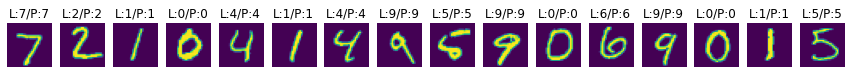

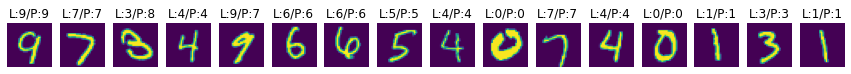

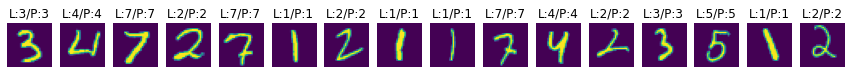

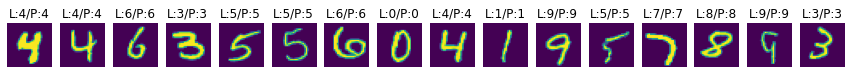

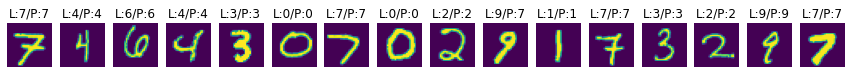

In [ ]:
# TO-DO: Run your trained model on the whole test set of MNIST and print the results 

test_performance = 0.0 #TO-DO # Calculate accuracy of the trained model on the test set (all minibatches considered!)

with torch.no_grad():
    for imgs, labels in testing_loader:
        outputs = model(imgs).detach().numpy()
        prediction = np.apply_along_axis(my_softmax, 1, outputs).argmax(axis=1)
        test_performance += np.sum(prediction == labels.detach().numpy()) / labels.shape[0]

    test_performance = test_performance / len(testing_loader)

# Your test accuracy has to be higher than 0.96. 
assert(test_performance>0.96), 'Your test accuracy is too low!'

print('Testing accuracy:', test_performance)

# TO-DO: Create a function that receives n batches of images, performs and displays the 
# predictions of the trained model and the labels. 
# Sample output (for a single epoch of training and number of batches = 5): 
# https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A4/5_batches_pred_wrong_highlighted.jpg
# Your output should look like the sample output. Note: your predictions/samples are going to be different! Only the overall 
# displaying template should follow the sample output. 

def predict_and_display(model,loader,n_batches=1): 
  # inputs:
  # model = your trained model
  # loader = test set dataloader 
  # n_batches = number of batches you are going to do prediction on
  
  batches = len(loader) #TO-DO: get all the batches from the test dataloader
  
  # Loop for "n_batches" iterations
  # for ... TO-DO:
  for i, (imgs, labels) in enumerate(loader, 1):

      if i > n_batches: # loops for n_batches iterations
          break

      # DEFINED ABOVE imgs = #TO-DO: grab images of a minibatch
      # DEFINED ABOVE labels = #TO-DO: grab labels of a minibatch
      scores = model(imgs).detach().numpy() #TO-DO: calculate the scores of a minibatch
      pred = np.apply_along_axis(my_softmax, 1, scores).argmax(axis=1) #calculate the preds of a minibatch based on the scores   
      
      # TO-DO: use matplotlib to show all images from a minibatch in a single row (see reference above).
      # on top of each image you should display the label and prediction for that sample: "L:#/P:#" (see reference above)   
      
      plt.figure(figsize=(15,15))

      for i in range(len(imgs)):
          plt.subplot(2, len(imgs), i+1)
          plt.imshow(imgs[i].view(28,28)) # cmap='Greys_r'
          plt.title(f'L:{labels[i]}/P:{pred[i]}')
          plt.axis('off')

# use your "predict_and_display" function to display the predictions, images and labels 
# of all samples from 5 minibatches at the same time (see reference above). 
predict_and_display(model, testing_loader, 5)

**End of the assignment!**